In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Loading

In [3]:
df = pd.read_csv("Mushroom_data.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

Data set have 23 rows and 8124 columns

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All columns are of Object data type

# Treating Missing/ Null Values

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Their are no null value in any of the column according to the above observation

In [7]:
cols = df.columns
cols

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
for val in cols:
    print(df[val].value_counts())
    print("-----------------------")

e    4208
p    3916
Name: class, dtype: int64
-----------------------
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
-----------------------
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
-----------------------
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
-----------------------
f    4748
t    3376
Name: bruises, dtype: int64
-----------------------
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
-----------------------
f    7914
a     210
Name: gill-attachment, dtype: int64
-----------------------
c    6812
w    1312
Name: gill-spacing, dtype: int64
-----------------------
b    5612
n    2512
Name: gill-size, dtype: int64
-----------------------
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name

After performing above observation we found:

    1) veil-type column have same value in all 8124 rows.
    2) stalk-root column contains large number of missing values

In [5]:
final_df = df.drop(['stalk-root','veil-type'],axis=1)

Dropped the veil-type and stalk-root column from the dataset as stak-root contains large missing values and veil type column contains same value

# Data Visualization

In [4]:
import seaborn as sns

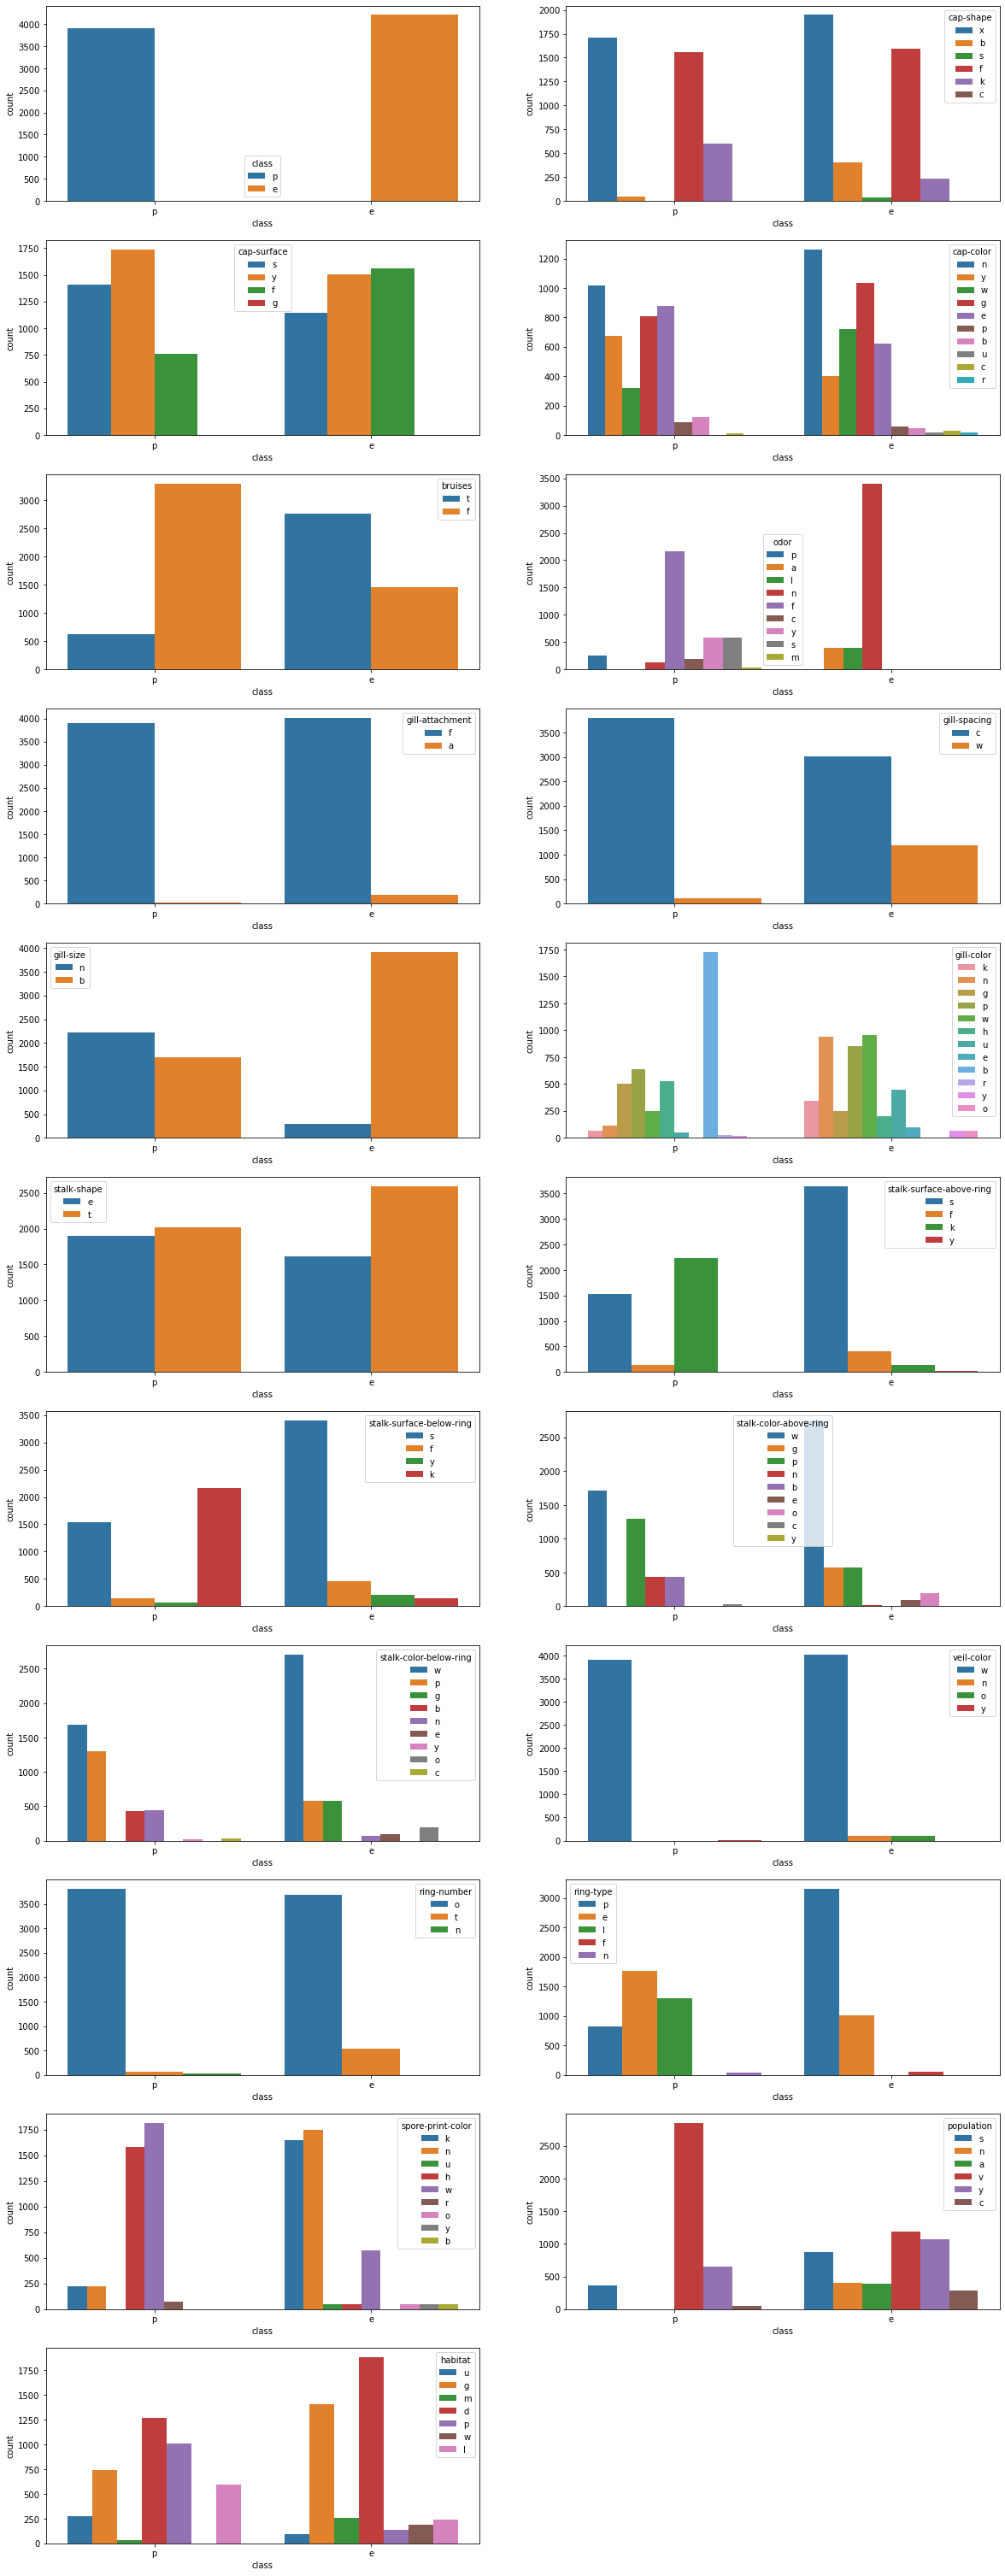

In [6]:
counter=1;
plt.figure(figsize=(20,100))
for column in final_df.columns:
        plt.subplot(20,2,counter)
        counter=counter+1
        sns.countplot(x='class',hue=column,data=final_df)

Observations from plots:

    1) The mushrooms with cap-shape b and s are likely to be more edible               
    2) The mushrooms with cap-color u and r are likely to be more edible
    3) The mushrooms with bruises t are likely to be more edible
    4) The mushrooms with odor n,l,a are likely to be more edible rest type of mushrooms with differnet odor are poisonus
    5) The mushrooms with gill size n  are poisonous
    6) The mushrooms with gill color b are poisonous
    7) The muhsrooms with stalk surface above ring type k  are poisonous
    8) The mushrooms in habitat w are edible
    9) The target variable class is balanced

In [12]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in final_df.columns:
    final_df[col] =  LE.fit_transform(final_df[col])

In [13]:
final_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


Transformed the data set into encoded labels for better model building

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Test_Train_Split

In [15]:
x = final_df.drop("class",axis=1)
y = final_df["class"]

In [16]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

Best Accuracy is 1.0 on Random State 0


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

# Model Building

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [19]:
LogReg = LogisticRegression(max_iter = 500)
LogReg.fit(x_train,y_train)
pred = LogReg.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1272
           1       0.96      0.92      0.94      1166

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



Using Logistic Regression we got accuracy of 94%

In [20]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Using Decision Tree algo we got accuracy of 100%

In [21]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred = RFC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Using Random Forest algo we got accuracy of 100%

In [22]:
SV = SVC()
SV.fit(x_train,y_train)
pred = SV.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1272
           1       1.00      0.98      0.99      1166

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



Using SVC algo we got accuracy of 99%

# Cross Validation

In [23]:
from sklearn.model_selection  import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [24]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8985421750663131


In [25]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.9102410761652141


In [26]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.8424046987495263


In [27]:

print(cross_val_score(LogReg,x,y,cv=5).mean())

0.849574460022736


Calculation best fit algorithm for final model building:

    Algo = accuracy - cross_cal_score = difference
    Logistic Reg  = 94-84  = 10
    Decision tree = 100-92 = 9
    Random forest = 100-89 = 11
    SVC           = 99-84  = 15
    
Best algo is which have minimum difference between accuracy score and validation score => Decision Tree

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
parameter = {'max_depth': np.arange(2,10),'criterion':['gini','entropy']}

In [30]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [31]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [32]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8}

Best parameters for Decison tree : {'criterion': 'gini', 'max_depth': 8}

In [33]:
Final_model = DecisionTreeClassifier(criterion='gini',max_depth=8)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

100.0


Final accuracy for the best trained model is 100%

# Saving the model

In [34]:
import joblib
joblib.dump(Final_model,"Mushroom_Final_Model.pkl")


['Mushroom_Final_Model.pkl']